In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import info

# path = f'../results/{info.task}/{info.user}/take_03/learning_progress.tsv'
# print(path)
# df = pd.read_csv(path, sep='\t')
df = pd.read_csv('C:/Users/Hammock/Documents/VU_masters_AI/learning_machines/learning_machines_robobo/results/obstacle_avoidance/guido/take_01/learning_progress.tsv', sep='\t')

In [110]:
# rename index col
df = df.rename(columns={'Unnamed: 0': 'index'})
df.head()

,index,accu_reward,accu_v_measure_sensor_distance,action_index,episode_index,epsilon,object_in_range,observations:,reward,v_distance_reward,v_measure_calc_distance,v_measure_sensor_distance
0,0,0.082926,1.463651,4.0,0.0,0.500000,1.0,"[0.15, 0.1363485686628723, 0.15, 0.15]",0.082926,0.008062,0.0,1.463651
1,1,0.215847,3.063651,4.0,0.0,0.499800,0.0,"[0.15, 0.15, 0.15, 0.15]",0.132921,0.014761,0.0,1.600000
2,2,0.380527,4.623644,2.0,0.0,0.499601,1.0,"[0.15, 0.15, 0.15, 0.15]",0.164680,0.047079,1.8,1.559992
3,3,0.224224,6.112617,2.0,0.0,0.499401,1.0,"[0.05484868283750638, 0.15, 0.15, 0.15]",-0.156304,0.041452,3.6,1.488974
4,4,0.224481,7.512048,2.0,0.0,0.499202,1.0,"[0.08359612741440757, 0.15, 0.15, 0.15]",0.000257,0.047018,5.4,1.399431


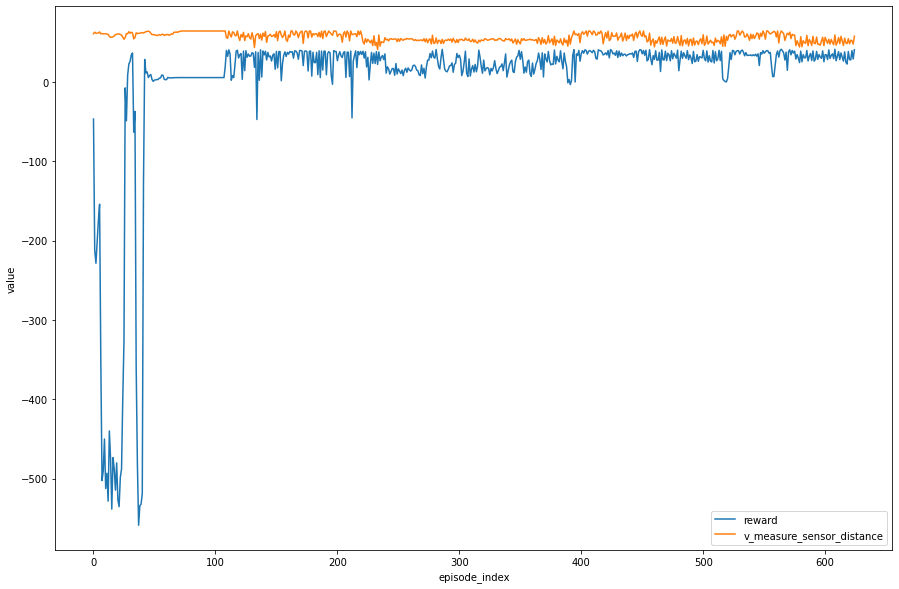

In [115]:

# group per episode and append to new df
_df = pd.DataFrame()
for k,v in df.groupby('episode_index'):
    _df = _df.append({'episode_index': int(k), 'reward': v['reward'].sum(), 'v_measure_sensor_distance': v['v_measure_sensor_distance'].sum(), 'epsilon': v['epsilon'].min(), 'v_distance_reward': v['v_distance_reward'].sum()}, ignore_index=True)
    # print(v['reward'].sum())

    
# plot 
fig, ax = plt.subplots(figsize=(15,10))
melt = _df.melt(id_vars='episode_index', value_vars=['reward', 'v_measure_sensor_distance'])
sns.lineplot(data=melt, x='episode_index', y='value', hue='variable')
plt.legend()
img_path = 'C:/Users/Hammock/Documents/VU_masters_AI/learning_machines/learning_machines_robobo/results/obstacle_avoidance/guido/take_01/'
plt.savefig(img_path+'/learning_rate_lineplot.png')

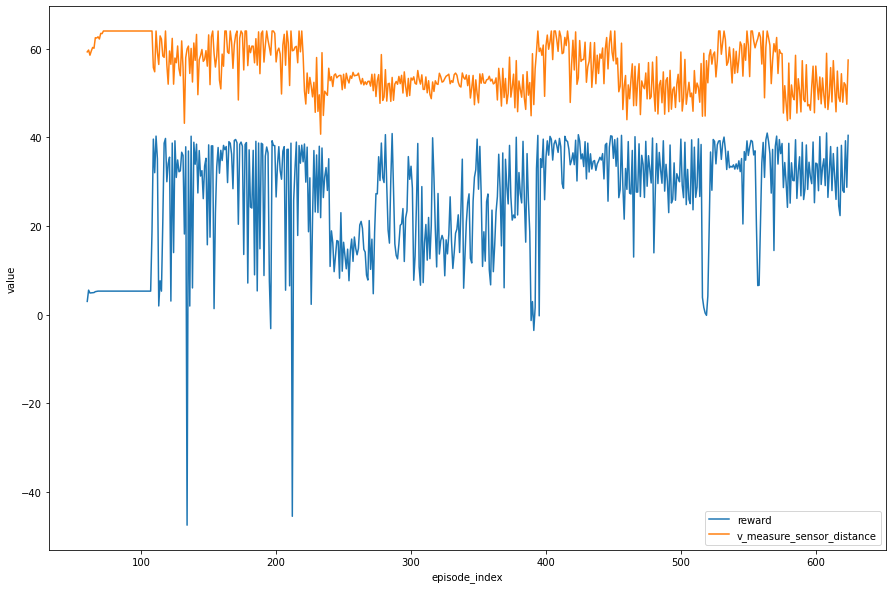

In [114]:
zoom_df = _df[60:]


# plot 
fig, ax = plt.subplots(figsize=(15,10))
melt = zoom_df.melt(id_vars='episode_index', value_vars=['reward', 'v_measure_sensor_distance'])
sns.lineplot(data=melt, x='episode_index', y='value', hue='variable')
plt.legend()
img_path = 'C:/Users/Hammock/Documents/VU_masters_AI/learning_machines/learning_machines_robobo/results/obstacle_avoidance/guido/take_01/'
plt.savefig(img_path+'/learning_rate_lineplot_zoom.png')

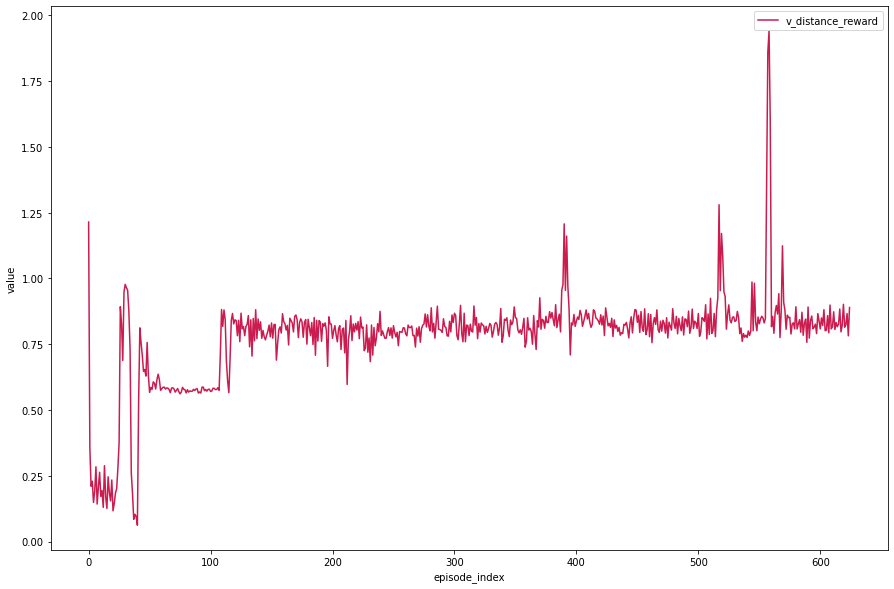

In [120]:
# plot  - epsilon and distance reward
fig, ax = plt.subplots(figsize=(15,10))
melt = _df.melt(id_vars='episode_index', value_vars=['v_distance_reward'])
sns.lineplot(data=melt, x='episode_index', y='value', hue='variable', palette='rocket')
plt.legend()
img_path = 'C:/Users/Hammock/Documents/VU_masters_AI/learning_machines/learning_machines_robobo/results/obstacle_avoidance/guido/take_01/'
plt.savefig(img_path+'/learning_rate_lineplot_epsilon_distance_reward.png')

In [ ]:
    
# plot 
fig, ax = plt.subplots(figsize=(15,10))
# melt = _df.melt(id_vars='episode_index', value_vars=['accu_reward', 'accu_v_measure_sensor_distance'])
sns.barplot(data=melt, x='episode_index', y='value', hue='variable')
plt.legend()
plt.savefig('../img/learning_rate_barplot.png')

In [ ]:
x = str(0.22)+'.model'
x